***Training Loop***

In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))
import numpy as np
import matplotlib.pyplot as plt
from src.model import LogisticRegression

In [2]:
# Create synthitic data
np.random.seed(42)
n_samples = 100
class_0_mean = [0, 0]
class_1_mean = [2, 2]
std = 0.5
blob_0 = np.random.normal(class_0_mean, std, size=(n_samples, 2))
y0 = np.zeros((n_samples, 1))
blob_1 = np.random.normal(class_1_mean, std, size=(n_samples, 2))
y1 = np.ones((n_samples, 1))

# Combine
X = np.vstack([blob_0, blob_1])
y = np.vstack([y0, y1])

indices = np.random.permutation(len(X))

X = X[indices]
y= y[indices]

print(f"X: {X.shape} y: {y.shape}")

X: (200, 2) y: (200, 1)


In [3]:
model = LogisticRegression(n_features=2, lr=0.01)
print(f"Weights: {model.weights} Bias: {model.bias}")

Weights: [[-0.65064257]
 [-0.48712538]] Bias: 0


In [4]:
losses = []
epochs = 50
for epoch in range(epochs):
    z, y_hat = model.forward(X)
    loss = model.loss(y, y_hat)
    dW, dB = model.backward(X, y, y_hat)
    model.update(dW, dB)
    losses.append(loss)
    print(f"Epoch: {epoch} | Loss: {loss}")


Epoch: 0 | Loss: 1.5762626807416786
Epoch: 1 | Loss: 0.48785932636528284
Epoch: 2 | Loss: 0.3422938552726996
Epoch: 3 | Loss: 0.25369056119610844
Epoch: 4 | Loss: 0.20038241465014575
Epoch: 5 | Loss: 0.16762980021230448
Epoch: 6 | Loss: 0.14630899180698095
Epoch: 7 | Loss: 0.1312612940675604
Epoch: 8 | Loss: 0.11981745410376714
Epoch: 9 | Loss: 0.11064118210446901
Epoch: 10 | Loss: 0.1030299831314314
Epoch: 11 | Loss: 0.09657556100337096
Epoch: 12 | Loss: 0.09101528470829871
Epoch: 13 | Loss: 0.08616681541620873
Epoch: 14 | Loss: 0.08189690023568051
Epoch: 15 | Loss: 0.07810475273167353
Epoch: 16 | Loss: 0.07471226030187898
Epoch: 17 | Loss: 0.07165774813265938
Epoch: 18 | Loss: 0.06889178285592637
Epoch: 19 | Loss: 0.06637423668544938
Epoch: 20 | Loss: 0.06407217409543685
Epoch: 21 | Loss: 0.061958296855049805
Epoch: 22 | Loss: 0.06000977938871371
Epoch: 23 | Loss: 0.05820738331089736
Epoch: 24 | Loss: 0.0565347753856354
Epoch: 25 | Loss: 0.05497799606253493
Epoch: 26 | Loss: 0.053525

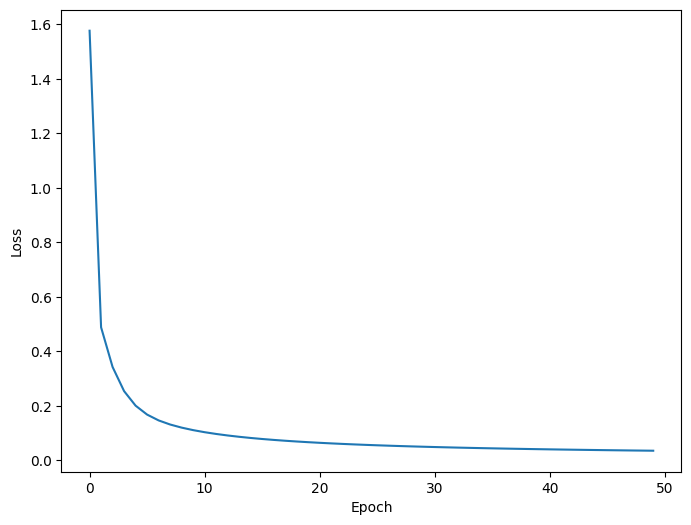

In [5]:
# Plot loss 

plt.figure(figsize=(8, 6))
plt.plot([i for i in range(epochs)], losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [6]:
# Measure accuracy

_ , y_hat = model.forward(X)

y_pred = (y_hat >= 0.5).astype(int)

accuracy = (y_pred == y).mean()
print(f"Accuracy: {accuracy}")

Accuracy: 1.0
